In [ ]:
'''Data Wrangling II
Create an “Academic performance” dataset of students and perform the following
operations usingPython.

1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.

3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.'''

In [6]:
import numpy as np 
import pandas as pd

df = pd.read_csv("academic_data.csv")

In [7]:
df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88,90.0,92
1,SA,Dixit,F,90.0,90,94.0,95
2,AB,Danial,M,NaN,na,100.0,80
3,DA,Kapoor,M,95.0,86,500.0,82
4,SA,Jha,F,NaN,84,98.0,84
5,WS,Thakur,F,87.0,NaN,97.0,86
6,DY,Kapoor,M,81.0,80,96.0,89
7,JK,Khanna,F,40.0,88,95.0,87
8,RT,Pardesi,M,10.0,96,94.0,88
9,UV,Pardesi,M,9.0,NaN,93.0,96


In [ ]:
'''1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.'''

In [3]:
df.isnull().sum()

Firstname    0
Lastname     0
Gender       0
SPOS         2
DSBDA        3
WT           1
DA           0
dtype: int64

In [6]:
print(df.isnull().values.any())

True


In [42]:
# Removing rows and columns conataining missing values

# drop all rows with NaN values
df.dropna(axis=0,inplace=True)

# drop all rows with atleast one NaN
new_df = df.dropna(axis = 0, how ='any')

# drop all rows that have all values as Nan
new_df = df.dropna(axis = 0, how ='all')

# drop all columns with atleast one NaN
new_df = df.dropna(axis = 1, how ='any')

# drop all columns that have all values as Nan
new_df = df.dropna(axis = 1, how ='all')

In [7]:
new_df = df.dropna(axis = 0, how ='any')
new_df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88,90.0,92
1,SA,Dixit,F,90.0,90,94.0,95
3,DA,Kapoor,M,95.0,86,500.0,82
6,DY,Kapoor,M,81.0,80,96.0,89
7,JK,Khanna,F,40.0,88,95.0,87
8,RT,Pardesi,M,10.0,96,94.0,88


In [ ]:
'''Inputing Missing Values in our Dataset
There are many options to pick from when replacing a missing value:
A single pre-decided constant value, such as 0.
Taking value from another randomly selected sample.
Mean, median, or mode for the column.
Interpolate value using a predictive model.'''

In [12]:
# Replacing NaNs with a single constant value
df.fillna(0,inplace=True)

# Replacing NaNs with the value from the previous row (method = 'pad’ for taking values from the previous row)
df['DSBDA'].fillna(method='pad', inplace=True)

# We use method = 'bfill’ for taking values from the next row.
df['SPOS'].fillna(method='bfill' , inplace=True)

In [ ]:
mean_spos = np.mean(df['SPOS'])
df['SPOS'].fillna(mean_spos,inplace=True)
df

In [ ]:
'''2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.'''

{'whiskers': [<matplotlib.lines.Line2D at 0x15f41656fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f416636d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f41656c70>],
 'medians': [<matplotlib.lines.Line2D at 0x15f41663d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f41671130>],
 'means': []}

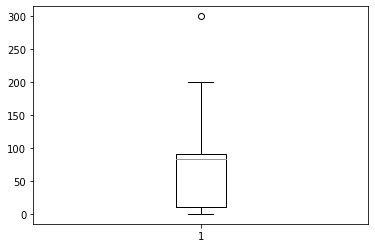

In [14]:
import matplotlib.pyplot as plt

plt.boxplot(x=df['SPOS'])

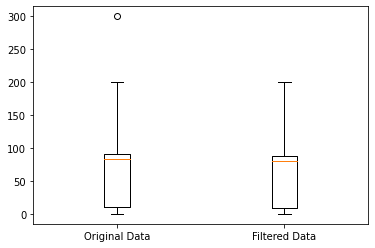

In [15]:
import numpy as np

q1 = np.percentile(df['SPOS'], 25)
q3 = np.percentile(df['SPOS'], 75)
iqr = q3 - q1
threshold = 1.5 * iqr
filtered_data = [x for x in df['SPOS'] if (q1 - threshold) <= x <= (q3 + threshold)]

plt.boxplot([df['SPOS'], filtered_data], labels=["Original Data", "Filtered Data"])
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_spos = scaler.fit_transform(df[['SPOS']])
print(scaled_spos)

[[0.28333333]
 [0.3       ]
 [0.        ]
 [0.31666667]
 [0.        ]
 [0.29      ]
 [0.27      ]
 [0.13333333]
 [0.03333333]
 [0.03      ]
 [0.66666667]
 [1.        ]]
